In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [6]:
# Reading the data
df = pd.read_csv(r'../data/bank-additional-full.csv', sep=';')


In [7]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (41188, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  fl

In [8]:
print("\nFirst few rows of the dataset:")
df.head()


First few rows of the dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [10]:
# Display basic statistics
print("\nBasic statistics of numerical columns:")
print(df.describe())


Basic statistics of numerical columns:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.5

In [11]:
# Display unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


Unique values in categorical columns:

job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan:
loan
no         33950
yes         6248
unknown      990


# Feature Engineering and Data Preparation

In [12]:
# 1. Convert categorical variables to numeric using one-hot encoding
def prepare_features(df):
    # Create copy of dataframe
    df_encoded = df.copy()
    
    # Convert target variable to numeric
    df_encoded['y'] = (df_encoded['y'] == 'yes').astype(int)
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'day_of_week', 'poutcome']
    
    # One-hot encoding
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols)
    
    return df_encoded

# Apply feature engineering
df_processed = prepare_features(df)

In [13]:
# Separate features and target
X = df_processed.drop('y', axis=1)
y = df_processed['y']

In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Create a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Record start time
    start_time = time.time()
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Record training time
    train_time = time.time() - start_time
    
    # Get predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    return {
        'train_time': train_time,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    }

In [17]:
# Create and evaluate models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

In [18]:
# Dictionary to store results
results = {}

In [19]:
# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)


Evaluating KNN...
Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating SVM...


In [20]:
# Create results DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)


In [21]:
# Display results
print("\nModel Comparison Results:")
print(results_df)


Model Comparison Results:
                     train_time  train_accuracy  test_accuracy
KNN                      0.0172          0.9199         0.8982
Logistic Regression      0.4388          0.9117         0.9115
Decision Tree            0.2707          1.0000         0.8853
SVM                     12.8562          0.9281         0.9091


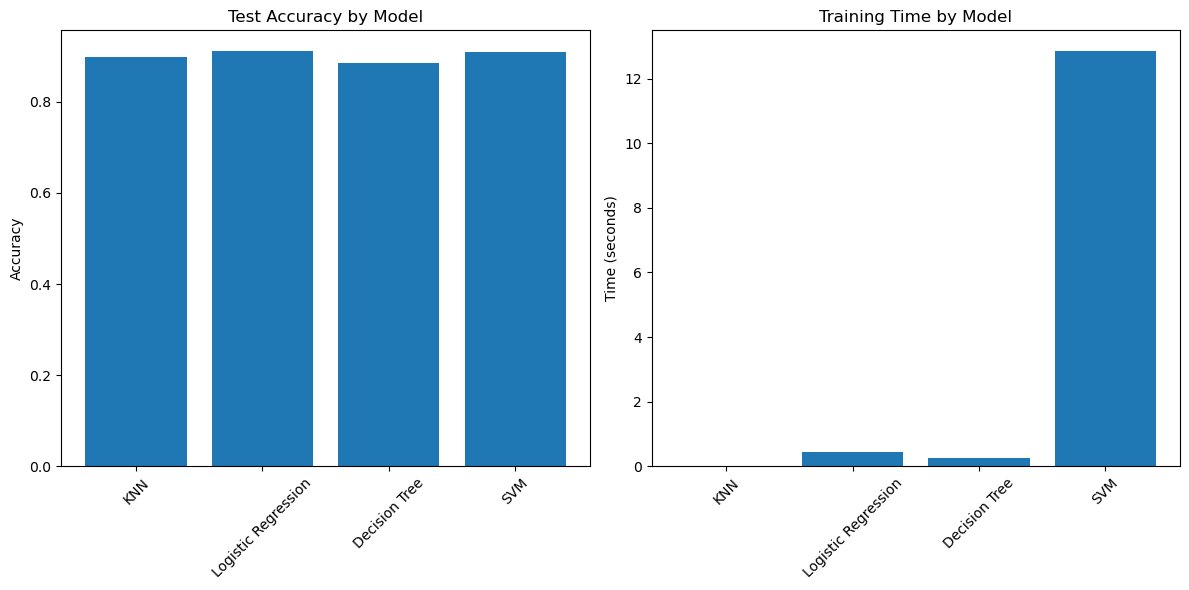

In [22]:
# Visualize results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(results_df.index, results_df['test_accuracy'])
plt.title('Test Accuracy by Model')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(results_df.index, results_df['train_time'])
plt.title('Training Time by Model')
plt.xticks(rotation=45)
plt.ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

In [23]:
# Detailed analysis of best performing model
best_model_name = results_df['test_accuracy'].idxmax()
best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

In [24]:
print(f"\nDetailed Analysis of {best_model_name}:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Detailed Analysis of Logistic Regression:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



[[7103  200]
 [ 529  406]]


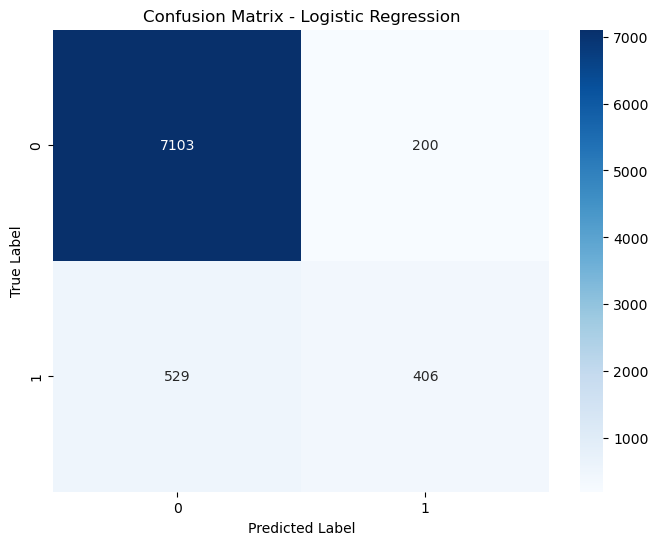

In [25]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


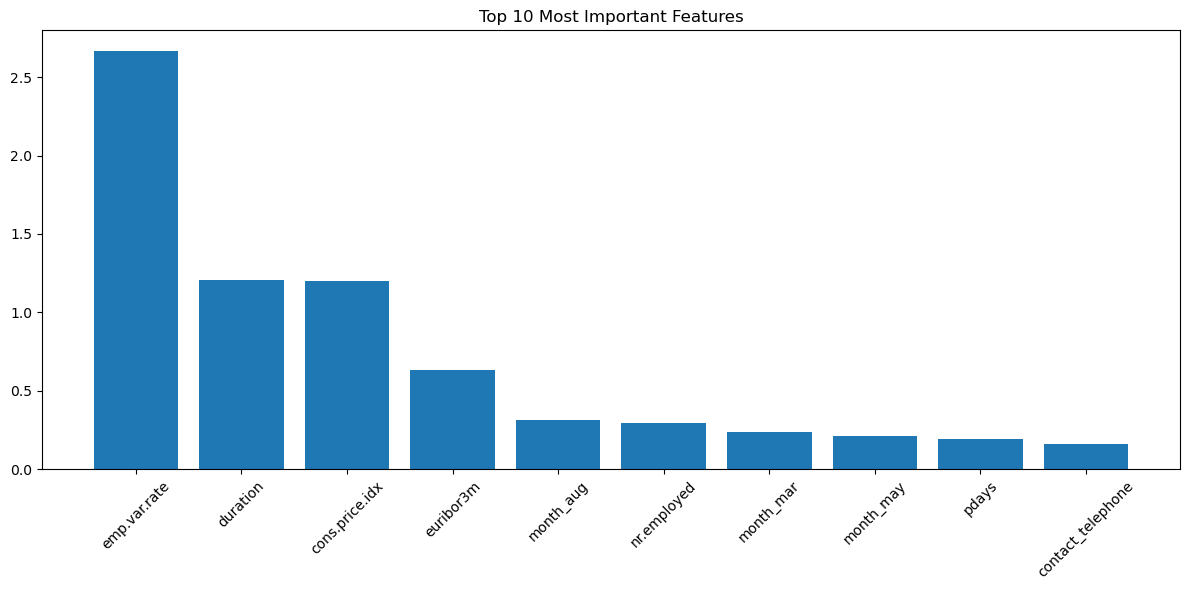

In [26]:
# Feature importance analysis (for Logistic Regression)
if best_model_name == 'Logistic Regression':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': abs(best_model.coef_[0])
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
    plt.title('Top 10 Most Important Features')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [27]:
# Model Improvement - Grid Search for best parameters
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    }
}

In [28]:
# Perform grid search for each model
best_models = {}
for name, model in models.items():
    print(f"\nPerforming Grid Search for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    best_models[name] = grid_search.best_estimator_


Performing Grid Search for KNN...
Best parameters: {'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score: 0.8978

Performing Grid Search for Logistic Regression...
Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best cross-validation score: 0.9110

Performing Grid Search for Decision Tree...
Best parameters: {'max_depth': 5, 'min_samples_split': 5}
Best cross-validation score: 0.9135

Performing Grid Search for SVM...
Best parameters: {'C': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.9073


In [29]:
# Compare improved models
improved_results = {}
for name, model in best_models.items():
    improved_results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

In [30]:
# Create improved results DataFrame
improved_results_df = pd.DataFrame(improved_results).T
improved_results_df = improved_results_df.round(4)

In [31]:
print("\nImproved Model Comparison Results:")
print(improved_results_df)


Improved Model Comparison Results:
                     train_time  train_accuracy  test_accuracy
KNN                      0.0034          1.0000         0.8937
Logistic Regression      0.3656          0.9116         0.9116
Decision Tree            0.0646          0.9174         0.9150
SVM                     12.8420          0.9281         0.9091


In [32]:
# Compare original vs improved results
comparison_df = pd.DataFrame({
    'Original Test Accuracy': results_df['test_accuracy'],
    'Improved Test Accuracy': improved_results_df['test_accuracy']
})

<Figure size 1000x600 with 0 Axes>

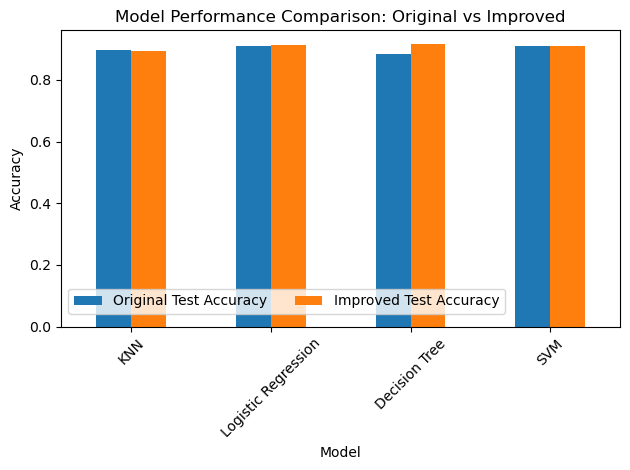

In [49]:
plt.figure(figsize=(10, 6))
ax = comparison_df.plot(kind='bar')
plt.title('Model Performance Comparison: Original vs Improved')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Positioning the legend inside the plot, just above the 0.0 line
plt.legend(loc='lower left', bbox_to_anchor=(0.0, 0.02), ncol=2, frameon=True)  # Adjust bbox_to_anchor as needed
plt.tight_layout()
plt.show()

# Additional Exploratory Data Analysis and Visualizations

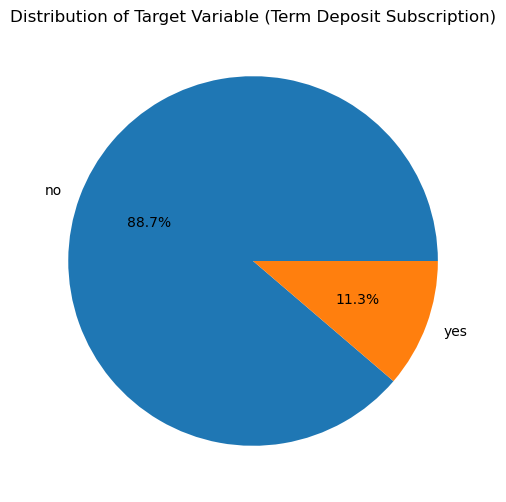

In [34]:
# 1. Distribution of Target Variable
plt.figure(figsize=(8, 6))
plt.pie(df['y'].value_counts(), labels=df['y'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Target Variable (Term Deposit Subscription)')
plt.show()

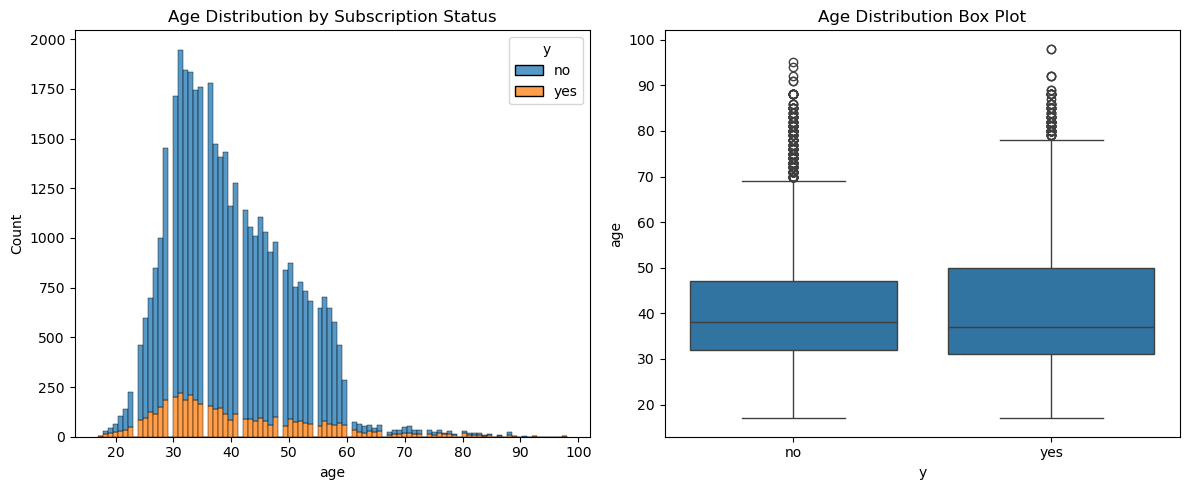

In [35]:
# 2. Age Distribution Analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', hue='y', multiple="stack")
plt.title('Age Distribution by Subscription Status')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='age')
plt.title('Age Distribution Box Plot')
plt.tight_layout()
plt.show()

/var/folders/_6/1bvwn11x4bsd397n2jm431cc0000gr/T/ipykernel_91013/2175878973.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.countplot(data=df, x='month', hue='y', order=pd.value_counts(df['month']).index)


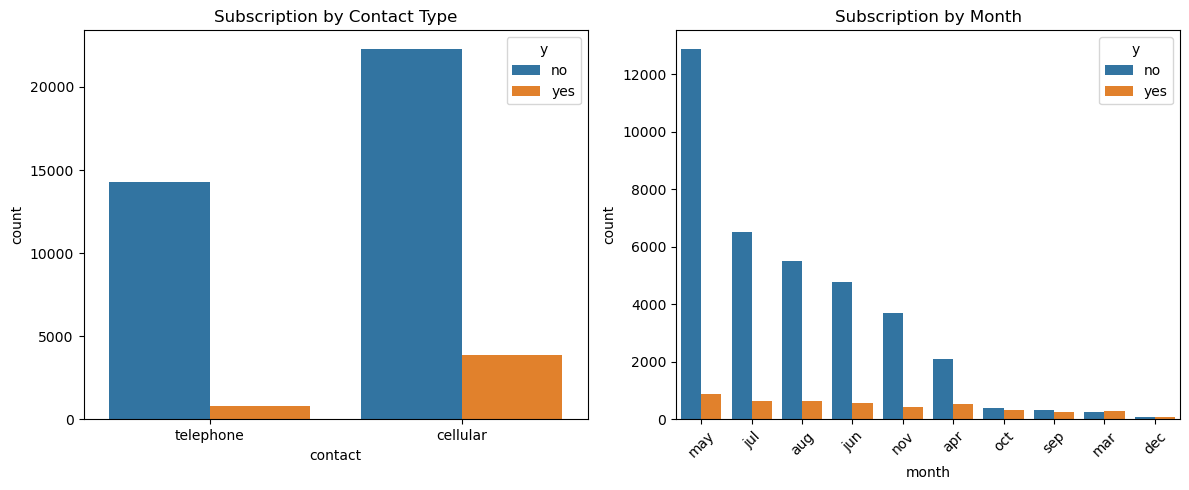

In [36]:
# 3. Campaign Contact Analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='contact', hue='y')
plt.title('Subscription by Contact Type')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='month', hue='y', order=pd.value_counts(df['month']).index)
plt.title('Subscription by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

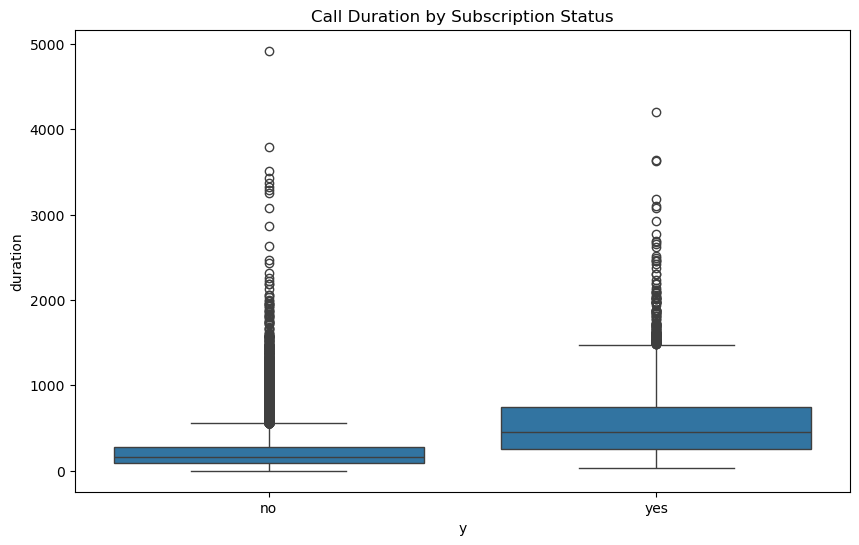

In [37]:
# 4. Duration Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='duration')
plt.title('Call Duration by Subscription Status')
plt.show()

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754 

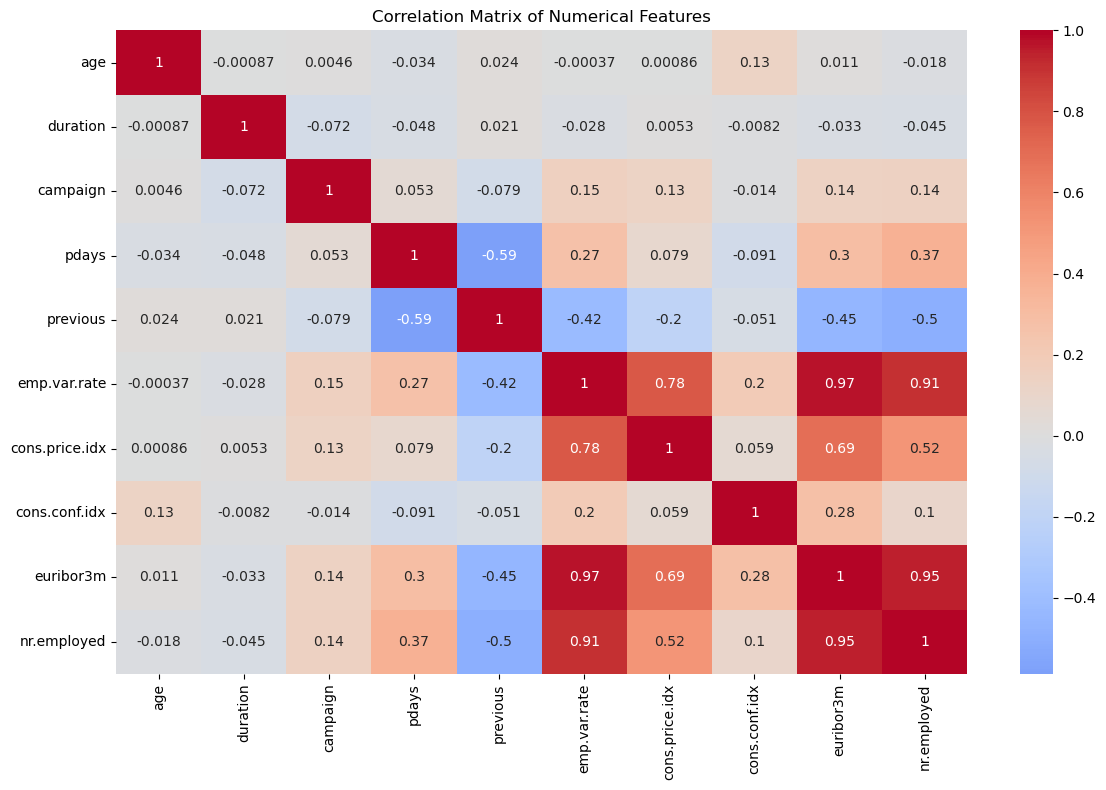

In [38]:
# 5. Feature Correlations
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [39]:
# Feature Importance Analysis for all models
def get_feature_importance(model, feature_names):
    if hasattr(model, 'coef_'):
        # For linear models (Logistic Regression)
        importance = abs(model.coef_[0])
    elif hasattr(model, 'feature_importances_'):
        # For tree-based models (Decision Tree)
        importance = model.feature_importances_
    else:
        return None
    
    return pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

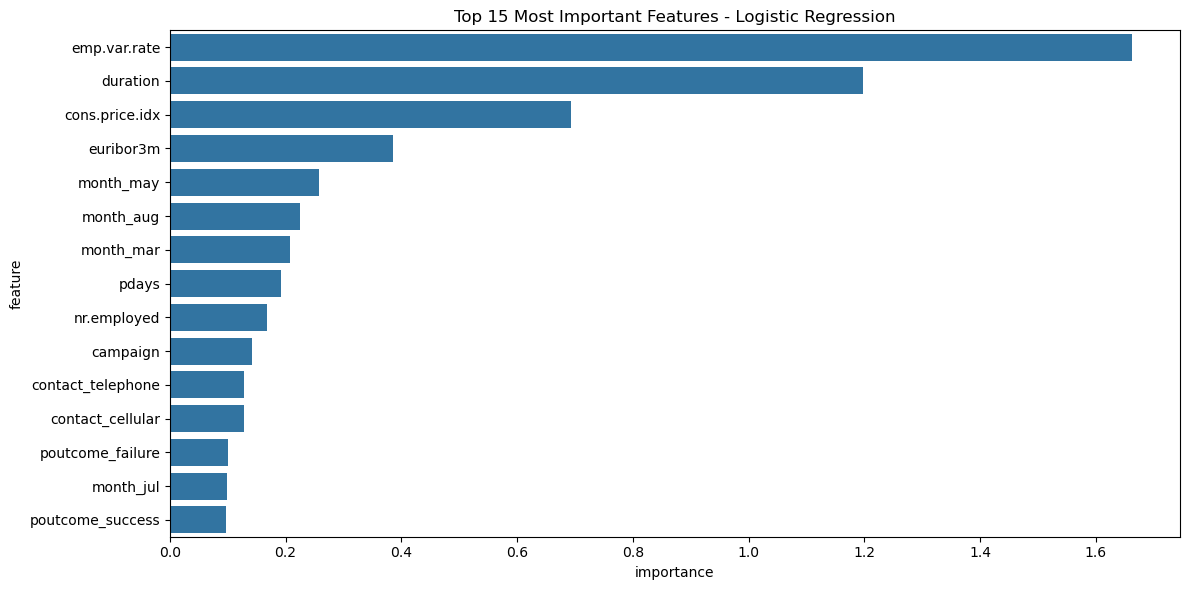

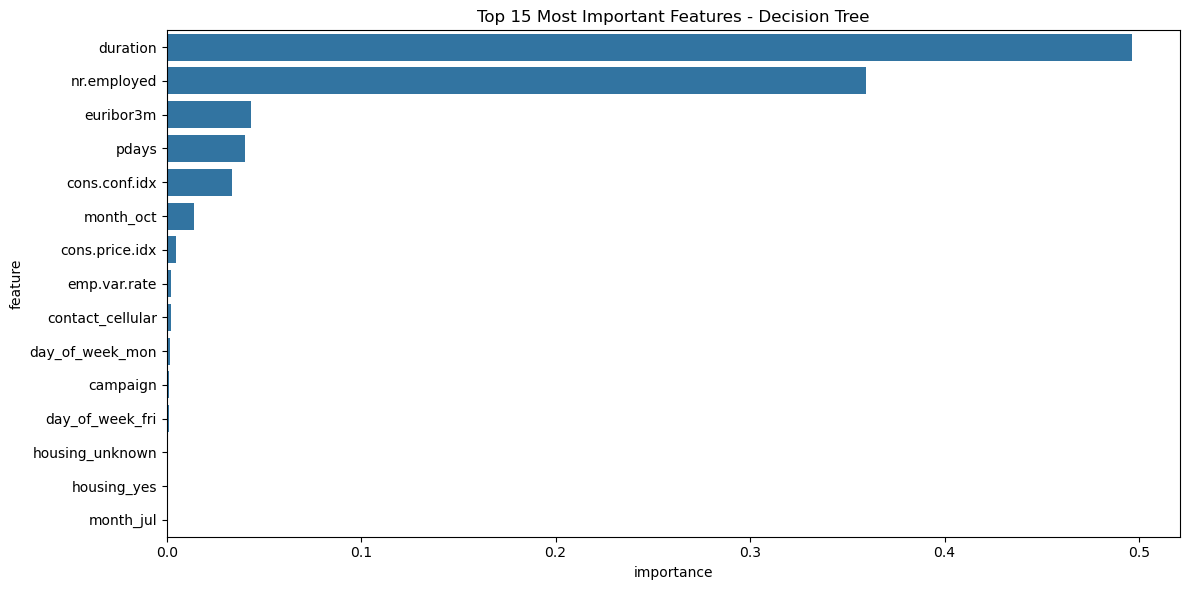

In [40]:
# Analyze feature importance for applicable models
for name, model in best_models.items():
    importance_df = get_feature_importance(model, X.columns)
    if importance_df is not None:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=importance_df.head(15), x='importance', y='feature')
        plt.title(f'Top 15 Most Important Features - {name}')
        plt.tight_layout()
        plt.show()

# Business Insights and Recommendations

In [41]:
# 1. Model Performance Analysis
best_model_name = improved_results_df['test_accuracy'].idxmax()
best_accuracy = improved_results_df.loc[best_model_name, 'test_accuracy']

In [42]:
print(f"1. Best Performing Model: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.2%}")

1. Best Performing Model: Decision Tree
   Accuracy: 91.50%


In [43]:
# 2. Campaign Success Rate
success_rate = (df['y'] == 'yes').mean()
print(f"\n2. Overall Campaign Success Rate: {success_rate:.2%}")


2. Overall Campaign Success Rate: 11.27%


In [44]:
# 3. Contact Method Analysis
contact_success = df.groupby('contact')['y'].apply(lambda x: (x == 'yes').mean())
print("\n3. Success Rate by Contact Method:")
for method, rate in contact_success.items():
    print(f"   {method}: {rate:.2%}")



3. Success Rate by Contact Method:
   cellular: 14.74%
   telephone: 5.23%


In [45]:
# 4. Temporal Analysis
month_success = df.groupby('month')['y'].apply(lambda x: (x == 'yes').mean())
best_month = month_success.idxmax()
print(f"\n4. Best Performing Month: {best_month}")
print(f"   Success Rate: {month_success[best_month]:.2%}")


4. Best Performing Month: mar
   Success Rate: 50.55%


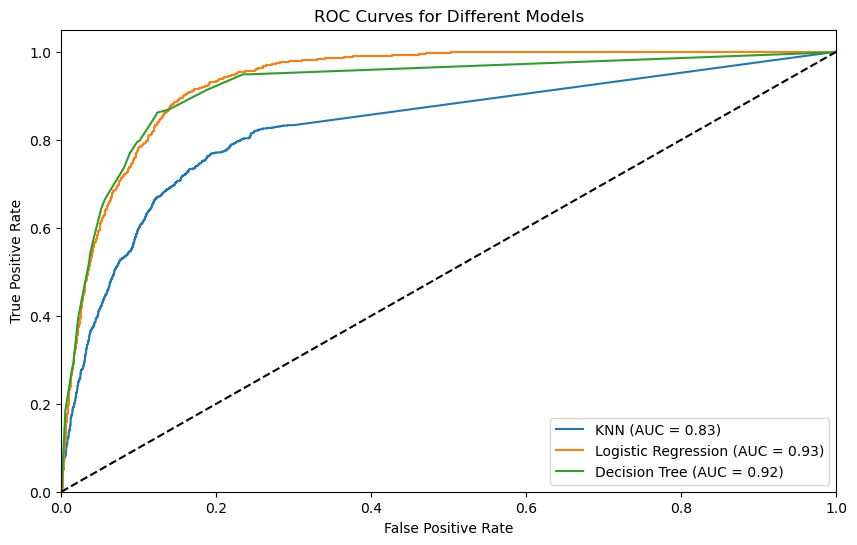

In [46]:
# ROC Curve Comparison
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 6))

for name, model in best_models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()